In [1]:
import os
import cv2
import urllib
import numpy as np
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.layers import *
from lib.activations import *
from lib.metrics import *
from lib.optimizers import *
from lib.model import Model

In [4]:
def load_mnist_dataset(dataset, path):
    labels = os.listdir(os.path.join(path, dataset))
    X = []
    y = []
    
    for label in labels:
        for file in os.listdir(os.path.join(path, dataset, label)):
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)
            X.append(image)
            y.append(label)
    
    return np.array(X), np.array(y).astype('uint8')

def create_data_mnist(path):
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)    
    
    return X, y, X_test, y_test

In [3]:
URL = "https://nnfs.io/datasets/fashion_mnist_images.zip"
FILE = "fashion_mnist_images.zip"
FOLDER = "fashion_mnist_images"

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

Unzipping images...


In [37]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

In [38]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [39]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(12000, 28, 28)


In [40]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Class: 0


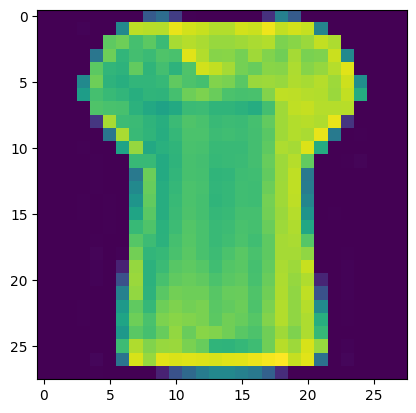

In [41]:
c = 0

print("Class:", y[c])
plt.imshow((X[c].reshape(28, 28)))
plt.show()

In [42]:
print(X.shape, y.shape)

(12000, 784) (12000,)


In [43]:
# ONLY FOR BIARY


y = y.reshape(-1, 1) # Now classes are binary
y_test = y_test.reshape(-1, 1) # Now classes are binary


print(X.shape, y.shape)

(12000, 784) (12000, 1)


In [48]:


model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 1))
model.add(Activation_Sigmoid())

model.set(
    loss=Loss_BinaryCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-4),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X,
    y, 
    validation_data=(X, y),
    epochs=10, 
    batch_size=128, 
    print_every=100
)

epoch: 1
    step: 0, acc: 0.945, loss: 0.680 (data_loss: 0.680,reg_loss: 0.000), lr: 0.001
    step: 1, acc: 1.000, loss: 0.741 (data_loss: 0.741,reg_loss: 0.000), lr: 0.000999900009999
training, acc: 103.360, loss: 0.702 (data_loss: 0.702, reg_loss: 0.000), lr: 0.000999900009999
validation, acc: 107.840,loss: 0.693



asdsd

In [47]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=2)


print(X.shape, y.shape)
y = y.reshape(-1, 1)
print(X.shape, y.shape)

model = Model()

model.add(Layer_Dense(2, 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 1))
model.add(Activation_Sigmoid())

model.set(
    loss=Loss_BinaryCrossentropy(),
    optimizer=Optimizer_Adam(decay=5e-7),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X,
    y, 
    validation_data=(X, y),
    epochs=1, 
    batch_size=128, 
    print_every=100
)

print(X[0])


(200, 2) (200,)
(200, 2) (200, 1)
epoch: 1
    step: 0, acc: 0.055, loss: 0.700 (data_loss: 0.700,reg_loss: 0.000), lr: 0.001
    step: 1, acc: 0.278, loss: 0.682 (data_loss: 0.682,reg_loss: 0.000), lr: 0.0009999995000002499
training, acc: 11.680, loss: 0.694 (data_loss: 0.694, reg_loss: 0.000), lr: 0.0009999995000002499
validation, acc: 28.800,loss: 0.693

[0. 0.]
